# 02. Neural Network Classfication with PyTorch

classfication is a problem of prediction whether something is one thing or another (there can be multiple things as the options)

https://www.learnpytorch.io/02_pytorch_classification/

## 1. Make clasffication data and get it ready

In [1]:
from sklearn.datasets import  make_circles

# make 1000 samples 
n_samples = 1000

# Create cirles
X, y = make_circles(n_samples, noise=0.03, random_state = 42) 


In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X : \n {X[:5]}")
print(f"First 5 samples of y : \n {y[:5]}")

First 5 samples of X : 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y : 
 [1 1 1 1 0]


In [4]:
# Make dataframe of circle data  
import pandas as pd 

circles = pd.DataFrame({"X1" : X[:,0], "X2": X[:,1], "Label" :y})
circles

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


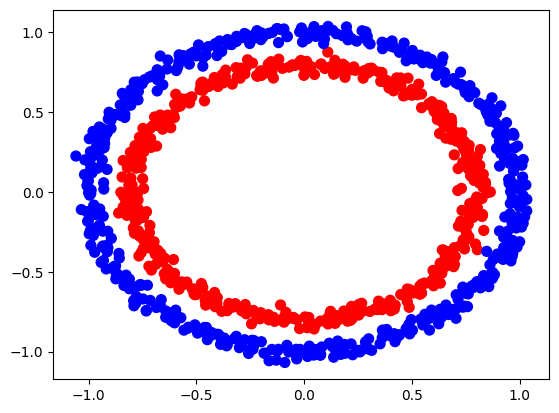

In [5]:
#  Visualize, visuzlize and visualize 
import matplotlib.pyplot as plt 
plt.scatter(x = circles["X1"], y = circles["X2"],  c=circles["Label"], cmap="bwr", s=50)

**Note:** The date we're working with is often refered to as a toy dataset, a dataset that is samll enough to experiment but still sizeable enough to practice the fundamentals. 

### 1.1 Check input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# View the first example of features and labels 
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensor and create train and test splits

In [8]:
# Turn data into tensors
import torch 
torch.__version__

'2.8.0+cu126'

In [9]:
type(X)

numpy.ndarray

In [10]:
# turn data into tensor 
X = torch.from_numpy(X).type(torch.float) 
y = torch.from_numpy(y).type(torch.float) 


X[:5] 

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

In [11]:
type(X)

torch.Tensor

In [12]:
# split data into training and test sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, test_size = 0.2)

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model 

lets' build a model to classify our blue and red dots 

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (By Subclassing `nn.Module`) 
3. Define a loss function and optimizer 
4. Create a training and test loop

In [14]:
import torch 
from torch import nn 

# Make device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [15]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers taht are capable of handling the shapes our data
3. Defines a `forward` method that outlines the forward pass (or forward computation) of the model 
4. Instatiate an instance of our model class and send it to the target `device`

In [16]:
# 1. Construct a model that subclasses nn.Module 
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling the shapes our data 
        self.layer_1 = nn.Linear(in_features = 2, out_features=5) #takes in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features = 5, out_features=1) #takes in 5 features from prev layer and outputs a single feature (same shape as y)
    # 3. Define a forward() method that outlines the forward pass 
    def forward(self,x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
    
# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.2792,  0.2030],
        [ 0.3730, -0.4207],
        [-0.2409,  0.0051],
        [ 0.0413, -0.6466],
        [ 0.3673, -0.2322]], device='cuda:0', requires_grad=True)

In [18]:
# Lets  replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features= 5),
    nn.Linear(in_features=5, out_features= 1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4307,  0.0951],
                      [ 0.6220, -0.3659],
                      [ 0.6759,  0.3188],
                      [-0.0421,  0.3738],
                      [-0.0892,  0.1729]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.3688, -0.1279,  0.6143,  0.4974,  0.1926], device='cuda:0')),
             ('1.weight',
              tensor([[0.0204, 0.1464, 0.3947, 0.0760, 0.3374]], device='cuda:0')),
             ('1.bias', tensor([0.2009], device='cuda:0'))])

In [20]:
# Make predictions 
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions : {len(untrained_preds)}, shape :{untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)} , shape {X_test.shape}")
print(f"\n First 10 predictions\n {untrained_preds[:10]}")
print(f"\n First 10 Labels :\n {y_test[:10]}")

Length of predictions : 200, shape :torch.Size([200, 1])
Length of test samples : 200 , shape torch.Size([200, 2])

 First 10 predictions
 tensor([[0.5198],
        [0.6946],
        [0.2501],
        [0.5954],
        [0.5494],
        [0.6538],
        [0.9087],
        [0.9000],
        [0.2379],
        [0.7096]], device='cuda:0')

 First 10 Labels :
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer 

which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error)

for classification you might want binary cross entropy or categorical cross entropy  (cross entropy)

as a reminder, the loss function measure how **wrong**  our model 

and for optimizers, two of the most common and useful are SGD and Adam, 

* for the loss function we're going to use `torch.nn.BECWithLogutsLoss()`, for more on what binary cross entropy (BCE) is, check out this article https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a/



In [21]:
# Setup the loss function
# loss_fn = nn.BCELoss # BCELoss = require inputs to have gone through the sigmoid activation function prior to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in 

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1, )

In [22]:
# Calculate accuracy  - out of 100 examples, what percentage dous our model get right? 
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    
    acc = (correct/len(y_pred)) *100
    
    return acc 


## 3. Train Model

to train our model, we're going to need to build a training loop with the following steps:

1. Forward Pass
2. Calculate the loss
3. Optimizer Zero Grad
4. Loss Backward (Backpropagation)
5. Optimizer (Gradient Descent)

### 3.1 Going from raw logits -> Prediction Probalities -> Prediction Labels

Our model outputs are going to be raw **logits**.   

we can convert these **logits** into **predictions probalities** by passing themn to some kind of activation function (e.g sigmoid for binary classfication and softmax for multiclass classfication)

then we can convert our models prediction probalities to **prediction labels** by either rounding them or taking the `argmax`

In [23]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits


tensor([[0.5198],
        [0.6946],
        [0.2501],
        [0.5954],
        [0.5494]], device='cuda:0')

In [24]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [25]:
# use the sigmoid activation function on our model logits to turn them into prediction probabilities 
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.6271],
        [0.6670],
        [0.5622],
        [0.6446],
        [0.6340]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >=0.5 , y = 1 (class 1)
* `y_pred_probs` <=0.5 , y = 0 (class 0)

In [26]:
torch.round(y_preds_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

In [27]:
# find the predicted labels  
y_preds = torch.round(y_preds_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [28]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Build a training and testing loop 

In [29]:
device

'cuda'

In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs 
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training dan evaluation Loop 
for epoch in range(epochs):
    # Training
    model_0.train()
    
    # 1. Forward Pass 
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels
    
    # 2. Calculate loss/acuraccy
    loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss expect raw logits as input 
                   y_train)
    acc = accuracy_fn(y_true = y_train, y_pred= y_pred)

    # 3. Optimizer zero grad 
    optimizer.zero_grad()
    
    # 4. Loss Backward (Backpropagation)
    loss.backward()
    
    # 5. Optimizer Step (Gradient Descent)
    optimizer.step()
    
    # Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true= y_test, y_pred = test_pred )
        
        
    # print out what happening 
    if epoch % 10 ==0 :
        print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}. Test Acc: {test_acc:.2f}%")

Epoch 0 | Loss: 0.73288, Acc: 50.00% | Test Loss: 0.73927. Test Acc: 50.00%
Epoch 10 | Loss: 0.70764, Acc: 50.00% | Test Loss: 0.71308. Test Acc: 50.00%
Epoch 20 | Loss: 0.69876, Acc: 59.13% | Test Loss: 0.70320. Test Acc: 57.50%
Epoch 30 | Loss: 0.69549, Acc: 53.75% | Test Loss: 0.69918. Test Acc: 49.00%
Epoch 40 | Loss: 0.69422, Acc: 52.38% | Test Loss: 0.69740. Test Acc: 49.50%
Epoch 50 | Loss: 0.69369, Acc: 52.12% | Test Loss: 0.69652. Test Acc: 47.00%
Epoch 60 | Loss: 0.69345, Acc: 52.00% | Test Loss: 0.69603. Test Acc: 48.50%
Epoch 70 | Loss: 0.69332, Acc: 51.00% | Test Loss: 0.69573. Test Acc: 49.00%
Epoch 80 | Loss: 0.69323, Acc: 50.25% | Test Loss: 0.69553. Test Acc: 48.50%
Epoch 90 | Loss: 0.69318, Acc: 50.75% | Test Loss: 0.69539. Test Acc: 48.50%


## 4. Make Predictions and Evaluate the Model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them viusal

in other words Visualize

to do so, we're going to import a function called `plot_decision_boundary()`

In [31]:
import requests 
from pathlib import Path 

# Download Helpter function from Learn PyTorch Repo  (if its not already downloaded)
if Path("helper_function.py").is_file():
    print("The file already exist")
else:
    print("Download helper_function.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_function.py", "wb") as f:
        f.write(request.content)
        


The file already exist


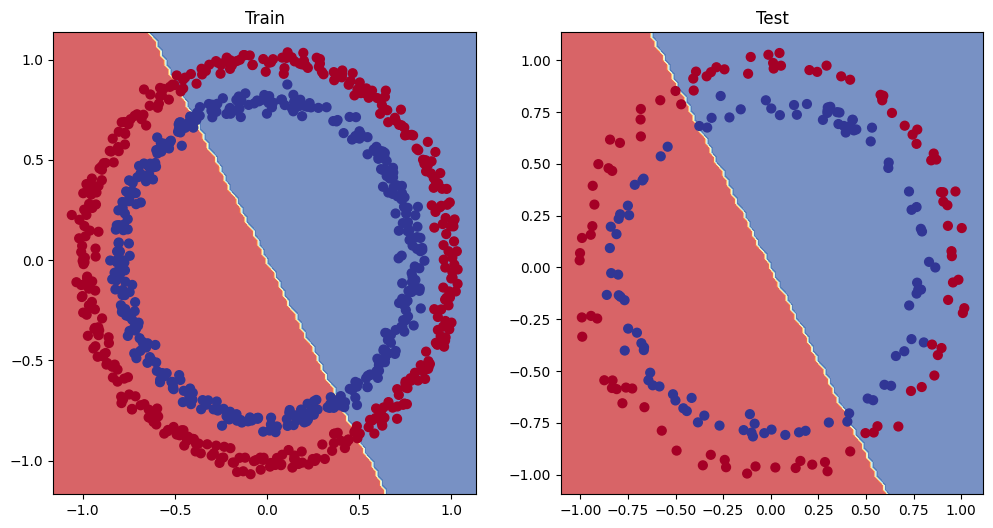

In [32]:
#  Plot decision boundary of the model
from helper_function import plot_predictions, plot_decision_boundary

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about the pattern in the data 
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer 
* Changing the activation functions 
* change the learning rate
* change the loss function 

These options are all from a model's perspective because they deal directly with the model, rather than the data

And because these options are all values we (as ML Engineer and DS) can change, they are referred as **Hyperparameter**

Lets try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers : 2 -> 3
* Increase the number of epochs: 100 -> 1000



In [33]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2,10)
        self.layer_2 = nn.Linear(10, 10)
        self.layer_3 = nn.Linear(10, 1)
        
     
    def forward(self, x):
        z = self.layer_1(x)
        z = self.layer_2(z)
        z = self.layer_3(z)
        return z


model_1 = CircleModelV1().to(device)
model_1 

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()


# Create an optimizer 
optimizer = torch.optim.SGD(params = model_1.parameters(), lr =0.1)


In [35]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# train for longer
epochs = 1000

# Put data on the target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)


for epoch in range(epochs):
    # training
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # 2. Calculate the loss/acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train, y_pred= y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # Loss Backward
    loss.backward()
    
    # 5. Optimizer
    optimizer.step()
    
    # testing
    model_1.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. calculate loss
        test_lost = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true= y_test, y_pred = test_pred)
        
    # print what happening
    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}. Test Acc: {test_acc:.2f}%")

Epoch 0 | Loss: 0.69396, Acc: 50.88% | Test Loss: 0.69529. Test Acc: 51.00%
Epoch 100 | Loss: 0.69305, Acc: 50.38% | Test Loss: 0.69529. Test Acc: 48.00%
Epoch 200 | Loss: 0.69299, Acc: 51.12% | Test Loss: 0.69529. Test Acc: 46.00%
Epoch 300 | Loss: 0.69298, Acc: 51.62% | Test Loss: 0.69529. Test Acc: 45.00%
Epoch 400 | Loss: 0.69298, Acc: 51.12% | Test Loss: 0.69529. Test Acc: 46.00%
Epoch 500 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69529. Test Acc: 46.00%
Epoch 600 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69529. Test Acc: 46.00%
Epoch 700 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69529. Test Acc: 46.00%
Epoch 800 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69529. Test Acc: 46.00%
Epoch 900 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69529. Test Acc: 46.00%


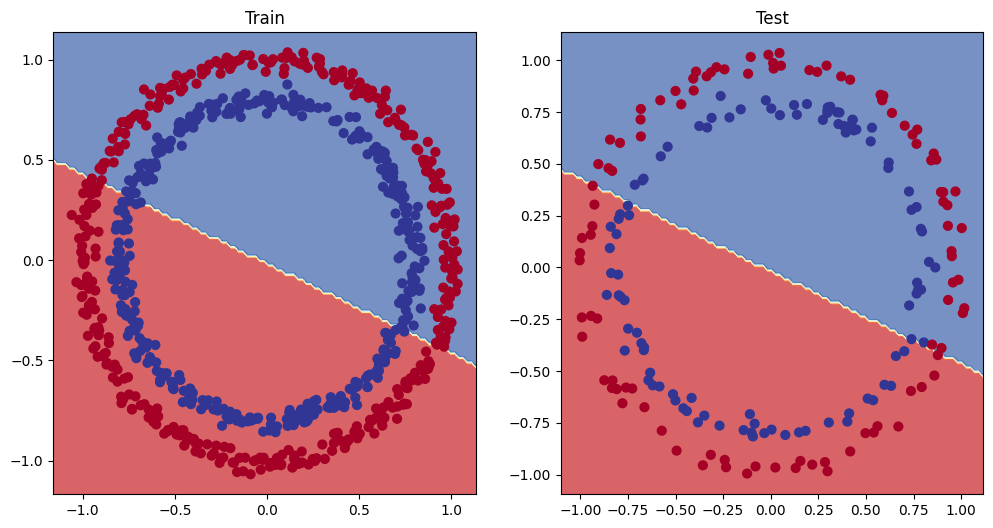

In [36]:
#  Plot decision boundary of the model
from helper_function import plot_predictions, plot_decision_boundary

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [37]:
# Create some data (samne as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01 

# Create data
X_regression = torch.arange(start, end,step).unsqueeze(dim = 1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# check the data  
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [38]:
# Create train and test splits 
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression =  X_regression[train_split:], y_regression[train_split:]


# check the lenghts of each 
len(X_train_regression), len(X_test_regression), len(y_train_regression),len(y_test_regression)

(80, 20, 80, 20)

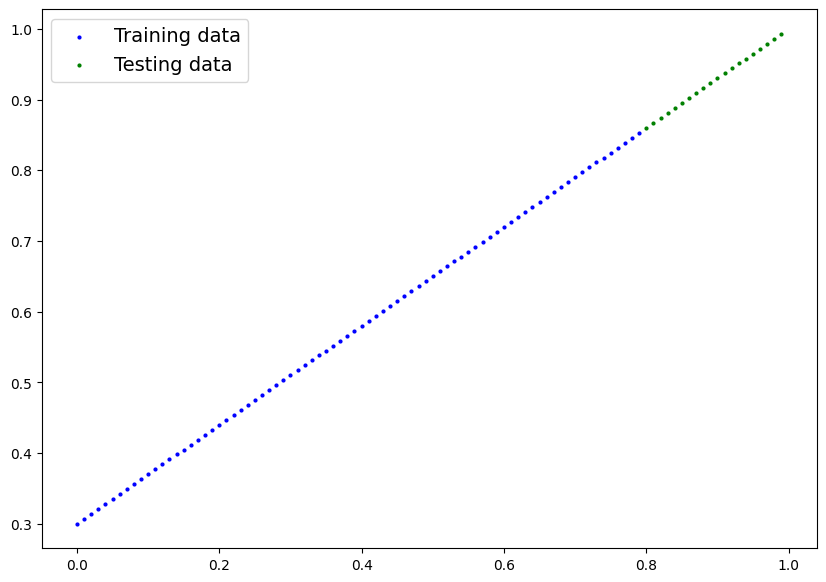

In [39]:
plot_predictions(train_data = X_train_regression, train_labels= y_train_regression, test_data =X_test_regression, test_labels = y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line

In [40]:
# Same architecture as model_1 (but using nn.Sequential())

model_2 = nn.Sequential(
    nn.Linear(1, 10),
    nn.Linear(10,15),
    nn.Linear(15,1)
).to(device)

model_2 

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=15, bias=True)
  (2): Linear(in_features=15, out_features=1, bias=True)
)

In [41]:
# loss and optimzer 
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.01)

In [42]:
# Train the model 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1500

# Put the data on the target device  
X_train_regression, y_train_regression = X_train_regression.to(device),y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device),y_test_regression.to(device)

# training 
for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # testing 
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
        
    #  print out whats going on  
     # print what happening
    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")
    
    

Epoch 0 | Loss: 0.73680 | Test Loss: 1.02623
Epoch 100 | Loss: 0.03666 | Test Loss: 0.00125
Epoch 200 | Loss: 0.03607 | Test Loss: 0.00156
Epoch 300 | Loss: 0.03428 | Test Loss: 0.00143
Epoch 400 | Loss: 0.03405 | Test Loss: 0.00229
Epoch 500 | Loss: 0.03131 | Test Loss: 0.00142
Epoch 600 | Loss: 0.03136 | Test Loss: 0.00212
Epoch 700 | Loss: 0.03022 | Test Loss: 0.00214
Epoch 800 | Loss: 0.02919 | Test Loss: 0.00220
Epoch 900 | Loss: 0.02824 | Test Loss: 0.00229
Epoch 1000 | Loss: 0.02857 | Test Loss: 0.00395
Epoch 1100 | Loss: 0.02654 | Test Loss: 0.00253
Epoch 1200 | Loss: 0.02692 | Test Loss: 0.00421
Epoch 1300 | Loss: 0.02498 | Test Loss: 0.00277
Epoch 1400 | Loss: 0.02421 | Test Loss: 0.00284


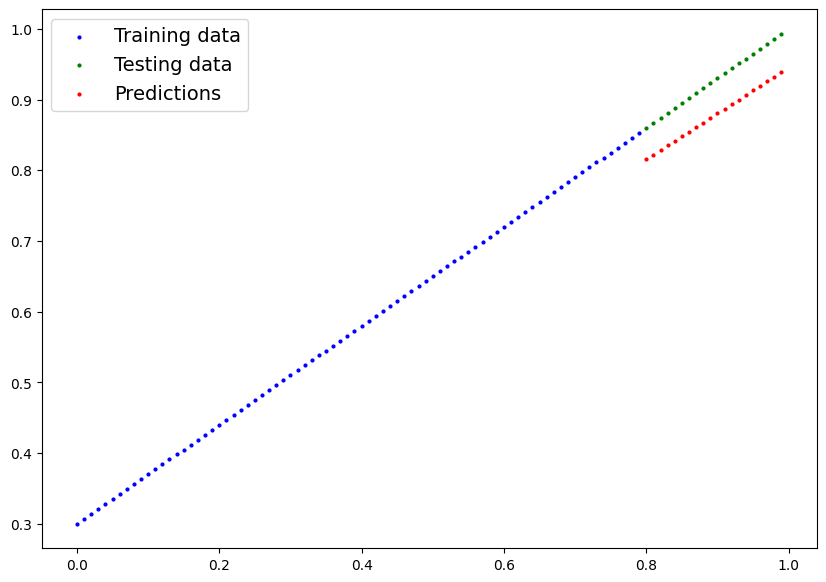

In [43]:
# Turn on evaluation mode  
model_2.eval()

# make prediction inference 
with torch.inference_mode():
    y_preds = model_2(X_test_regression)
     
plot_predictions(train_data = X_train_regression.cpu(), 
                 train_labels= y_train_regression.cpu(), 
                 test_data =X_test_regression.cpu(), 
                 test_labels = y_test_regression.cpu(), 
                 predictions=y_preds.cpu())

## 6. The missing pieceL non-linearity

What Patterns could draw if you were given an infinte amount of a straight and non-straight lines?

or in machine learning terms, an infinite (but really it is finite) of linear and non linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

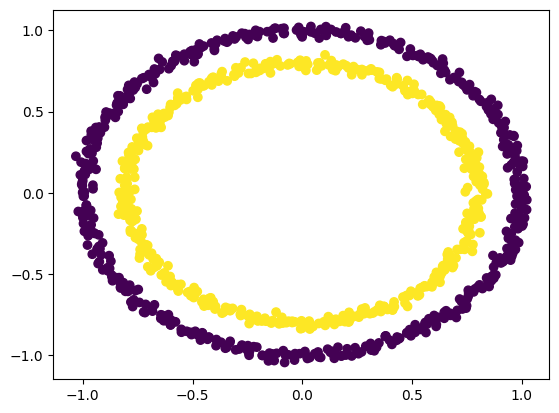

In [44]:
# Make and plot data  
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples,noise = 0.02, random_state =42 )

plt.scatter(X[:,0], X[:,1], c =y)

In [45]:
# Convert data to tensor and then to train and test splits 
import torch 
from sklearn.model_selection import train_test_split

# Turn data into tensor  
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split 
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state= 42, test_size= 0.2)

X_train[:5], y_train[:5]

(tensor([[ 0.6483, -0.4748],
         [ 0.6464, -0.7356],
         [-1.0020, -0.1328],
         [-0.9692, -0.2252],
         [-0.1676,  0.7936]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity 

* Linear = Straight Line
* Non-Linear = Non Straight Line

artificial neural networks are a large combination of linear (straight) and non-straight (non linear) functions which are potentially able to find patterns in data

In [46]:
# Building a model with Non-Linear Activation functions 

from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2,10)
        self.layer_2 = nn.Linear(10,10)
        self.layer_3 = nn.Linear(10,25)
        self.layer_4 = nn.Linear(25,10)
        self.layer_5 = nn.Linear(10,1)
        self.relu = nn.ReLU() # relu is non-linear activation function
    def forward(self, x):
        # where should we put our non-linear activation function>
        return self.layer_5(self.relu(self.layer_4(self.layer_3(self.relu(self.layer_2(self.layer_1(x)))))))
    
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=25, bias=True)
  (layer_4): Linear(in_features=25, out_features=10, bias=True)
  (layer_5): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [47]:
#  Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr = 0.1)



In [48]:
next(model_3.parameters()).device


device(type='cuda', index=0)

### 6.3 Training a model with non-linearity

In [49]:
# Random Seeds 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target
# Put the data on the target device  
X_train, y_train = X_train.to(device),y_train.to(device)
X_test, y_test = X_test.to(device),y_test.to(device)
model_3 = model_3.to(device)
# Loop through data
epochs = 1500

for epoch in range(epochs):
    # Training
    model_3.train()

    # 1. Forward pass  
    y_logits = model_3(X_train).squeeze()
    # print(f"y_logitsnya adalah {y_logits}")
    y_pred = torch.round(torch.sigmoid(y_logits)) 
    # print(f"y_prednya adalah {y_pred}")
    # 2. Calculate the loss  
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
    
    # 3. Optimizer zero grad 
    optimizer.zero_grad()
    
    # 4. Loss Backward
    loss.backward()
    
    # 5. Step the optimizer 
    optimizer.step()
    
    #  Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)
        
        # print what happening
    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}. Test Acc: {test_acc:.2f}%")


Epoch 0 | Loss: 0.69947, Acc: 50.00% | Test Loss: 0.69863. Test Acc: 50.00%
Epoch 10 | Loss: 0.69632, Acc: 50.00% | Test Loss: 0.69572. Test Acc: 50.00%
Epoch 20 | Loss: 0.69468, Acc: 50.00% | Test Loss: 0.69420. Test Acc: 50.00%
Epoch 30 | Loss: 0.69378, Acc: 50.00% | Test Loss: 0.69337. Test Acc: 50.00%
Epoch 40 | Loss: 0.69325, Acc: 50.00% | Test Loss: 0.69290. Test Acc: 50.00%
Epoch 50 | Loss: 0.69295, Acc: 50.00% | Test Loss: 0.69263. Test Acc: 50.00%
Epoch 60 | Loss: 0.69275, Acc: 50.00% | Test Loss: 0.69245. Test Acc: 50.50%
Epoch 70 | Loss: 0.69262, Acc: 63.50% | Test Loss: 0.69234. Test Acc: 67.00%
Epoch 80 | Loss: 0.69252, Acc: 53.75% | Test Loss: 0.69225. Test Acc: 56.50%
Epoch 90 | Loss: 0.69245, Acc: 53.25% | Test Loss: 0.69218. Test Acc: 51.50%
Epoch 100 | Loss: 0.69238, Acc: 52.50% | Test Loss: 0.69211. Test Acc: 50.00%
Epoch 110 | Loss: 0.69232, Acc: 52.62% | Test Loss: 0.69206. Test Acc: 50.50%
Epoch 120 | Loss: 0.69227, Acc: 51.88% | Test Loss: 0.69200. Test Acc: 51.0

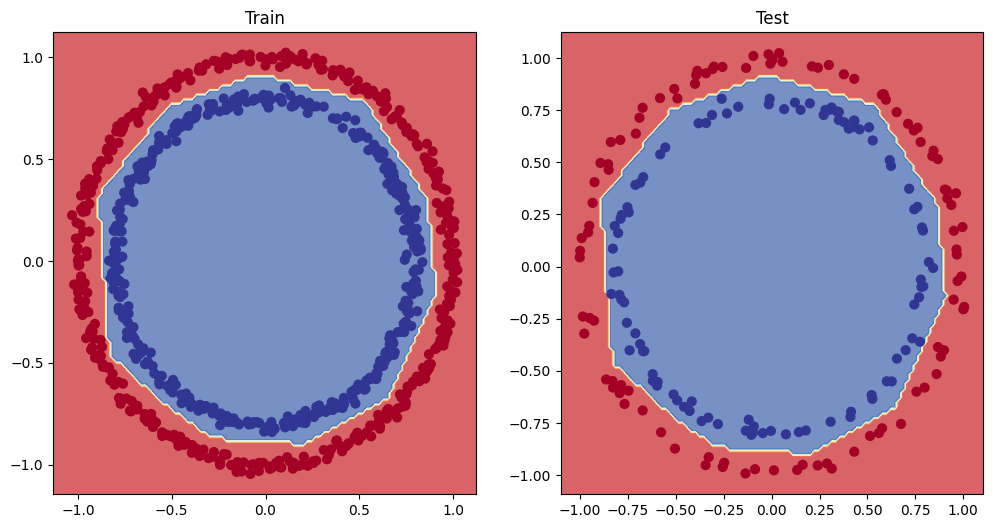

In [50]:
#  Plot decision boundary of the model
from helper_function import plot_predictions, plot_decision_boundary

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### 6.4 Evaluating a model trained with non-linear activation function

In [51]:
next(model_3.parameters()).device

device(type='cpu')

In [52]:
model_3.to(device)
# make predictions 
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

## 7. Replicating Non-Linear activation Functions

Neural Networks, rather than us telling the model what to learn, we give it the tools to discover in data and it tries to figure out the pattern on its own

and these tools are linear and non linear functions

In [53]:
# create a tensor 
A = torch.arange(-10,10,1, dtype = torch.float32)
A.dtype

torch.float32

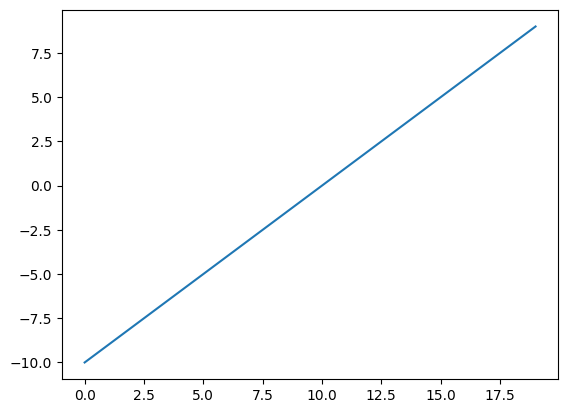

In [54]:
# Visualize the tensor
plt.plot(A)

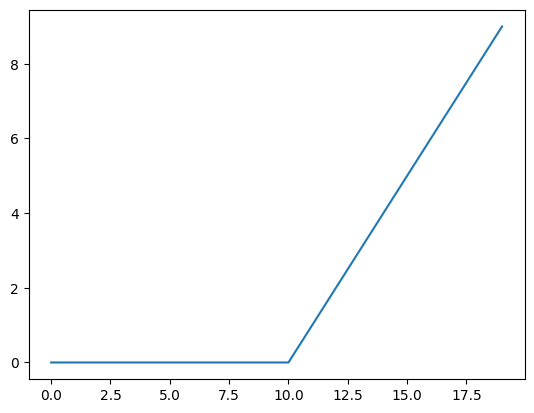

In [55]:
plt.plot(torch.relu(A))

In [56]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [57]:
def relu(x) -> torch.Tensor:
    return torch.maximum(torch.tensor(0),x) # input must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

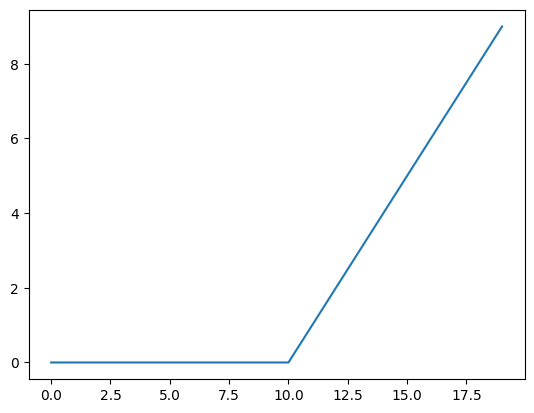

In [58]:
# Plot Relu Activation Function  
plt.plot(relu(A))

In [59]:
# Now lets to the same for sigmoid 
def sigmoid(x):
    return 1/(1+torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

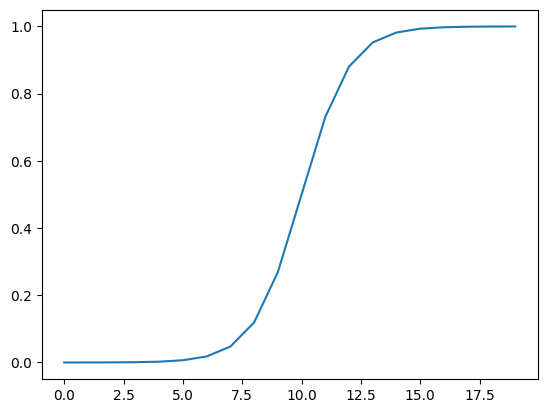

In [60]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

* Binary Classification = one thing or antoher (cat vs dog, spam vs not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another (Cat vs dog, vs chicken)

### 8.1 Creating a toy multi-class dataset

C:\Users\patri\AppData\Local\Temp\ipykernel_5768\3502799729.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


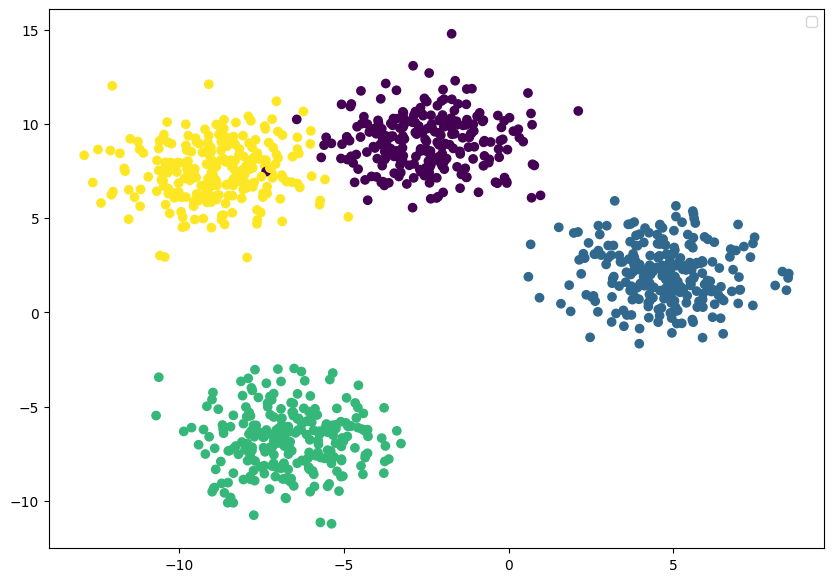

In [63]:
import torch 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split 

# set the hyperparameter for data creation 
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples= 1000, n_features= NUM_FEATURES, centers= NUM_CLASSES, cluster_std = 1.5, random_state= RANDOM_SEED )

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size= 0.2, random_state= RANDOM_SEED)

# 4. Plot Data 
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c = y_blob )
plt.legend()
plt.show()

### 8.2 Building a multiclass classifcation model in PyTorch

In [68]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [71]:
# Build a multi-class classification model 
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        """Initizalizes multi-class classification model
        
        Args:
            input_features (int): Number of input features to the model 
            output_features (int): number of outputs features (number of output classes)
            hidden units (int) : Number of hidden units between layers, default 8
        
        Returns:
        
        Example:
        
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_features, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_features)
        )
        
    def forward(self,x):
        return self.linear_layer_stack(x)
    
#  Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=  2, output_features=4, hidden_units= 8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [72]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# create an optimizer 
optimizer = torch.optim.SGD(params= model_4.parameters(), lr = 0.01)


### 8.4 Getting prediction probalities for a multi-class PyToch Model

in order to evaluate and train and test our mode, we need to convert our model's outputs (logits) to prediction probalities and then to prediction labels.

Logits -> pred probs -> pred labels

In [77]:
# lets get some raw output of our model (logits)
model_4.eval()
with torch.inference_mode():
   y_logits= model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [78]:
# Convert our model's logit output to prediction probalitities
y_pred_probs = torch.softmax(y_logits, dim =1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')
